In [48]:
## importing neccessary libraries


import pandas as pd

from matplotlib import pyplot as plt


In [49]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [50]:
## first five records
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
train_data.shape

(891, 12)

In [52]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

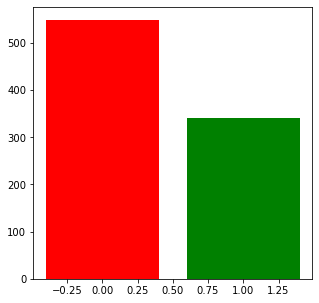

In [53]:
plt.figure(figsize=(5,5))
plt.bar(list(train_data['Survived'].value_counts().keys()),list(train_data['Survived'].value_counts()),color=["r","g"])
plt.show() 

In [54]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [55]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

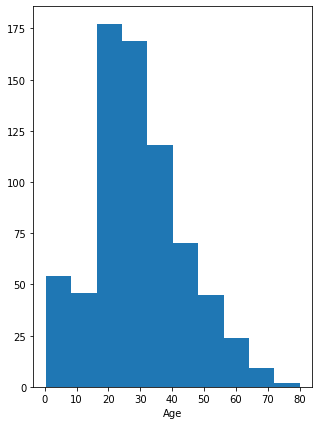

In [56]:
plt.figure(figsize=(5,7))
plt.hist(train_data['Age'])
plt.xlabel("Age")
plt.show()

In [57]:
## count number of null values

sum(train_data['Survived'].isnull())

0

In [58]:
sum(train_data['Age'].isnull())

177

In [59]:
## dropping all the N/A values
train_data=train_data.dropna()
sum(train_data['Age'].isnull())

0

In [60]:
x_train=train_data[['Age']]
y_train=train_data[['Survived']]

In [61]:
## model
from sklearn.tree import DecisionTreeClassifier

In [62]:
model = DecisionTreeClassifier()

In [63]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
## predicting from test data

## dropping all null values of Age in test data

sum(test_data['Age'].isnull())

86

In [65]:
test_data=test_data.dropna()

In [66]:
x_test=test_data[['Age']]


In [67]:
y_prediction=model.predict(x_test)

In [68]:
y_prediction

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [69]:
sub=pd.read_csv('gender_submission.csv')

In [70]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_prediction
})

In [73]:
submission

,PassengerId,Survived
12,904,1
14,906,0
24,916,1
26,918,1
28,920,1
...,...,...
404,1296,1
405,1297,0
407,1299,0
411,1303,0
